In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL

In [5]:
dataset = pd.read_csv("auto-mpg.csv")
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
dataset.drop(columns=['car name'], inplace=True)
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1


In [7]:
dataset.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


In [8]:
dataset['origin'] = dataset['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [9]:
dataset = pd.get_dummies(dataset, columns=['origin'], prefix='', prefix_sep='')
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
393,27.0,4,140.0,86,2790,15.6,82,False,False,True
394,44.0,4,97.0,52,2130,24.6,82,True,False,False
395,32.0,4,135.0,84,2295,11.6,82,False,False,True
396,28.0,4,120.0,79,2625,18.6,82,False,False,True
397,31.0,4,119.0,82,2720,19.4,82,False,False,True


In [10]:
dataset.replace({True: 1, False: 0}, inplace=True)
dataset.tail()

<ipython-input-10-35c65e5d8e1a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True: 1, False: 0}, inplace=True)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
393,27.0,4,140.0,86,2790,15.6,82,0,0,1
394,44.0,4,97.0,52,2130,24.6,82,1,0,0
395,32.0,4,135.0,84,2295,11.6,82,0,0,1
396,28.0,4,120.0,79,2625,18.6,82,0,0,1
397,31.0,4,119.0,82,2720,19.4,82,0,0,1


In [11]:
dataset = dataset[dataset['horsepower'] != '?']
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='raise')

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

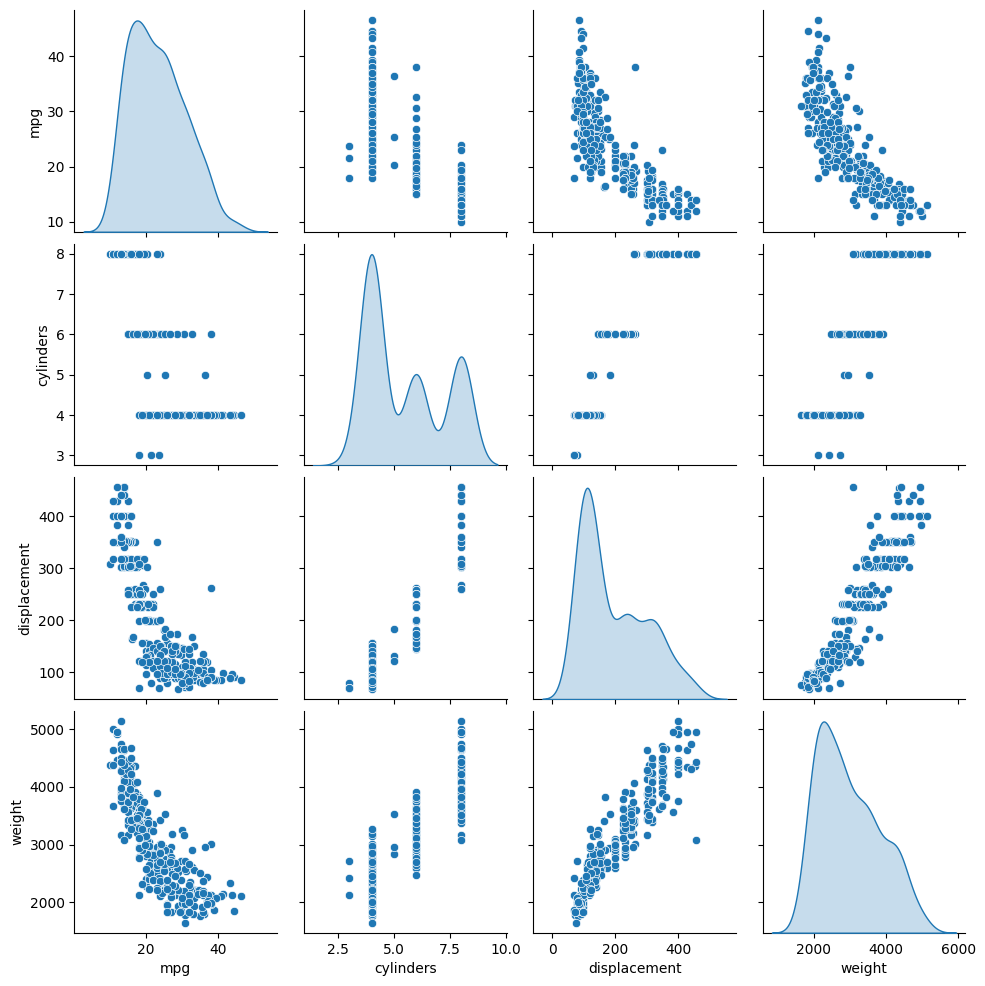

In [13]:
sns.pairplot(train_dataset[['mpg','cylinders', 'displacement', 'weight']], diag_kind='kde')
plt.show()

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [15]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [16]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
mpg,23.310510,7.728652
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.559236,2.789230
model year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [17]:
for col in train_features.columns:
       print(train_features[col].apply(type).value_counts())

cylinders
<class 'int'>    314
Name: count, dtype: int64
displacement
<class 'float'>    314
Name: count, dtype: int64
horsepower
<class 'int'>    314
Name: count, dtype: int64
weight
<class 'int'>    314
Name: count, dtype: int64
acceleration
<class 'float'>    314
Name: count, dtype: int64
model year
<class 'int'>    314
Name: count, dtype: int64
Europe
<class 'int'>    314
Name: count, dtype: int64
Japan
<class 'int'>    314
Name: count, dtype: int64
USA
<class 'int'>    314
Name: count, dtype: int64


In [18]:
# Now adapt the normalizer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [19]:
print(normalizer.mean.numpy())

[[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
  7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]]


In [20]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [21]:
## Build NN of 2 layers:

In [22]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [23]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (314, 9)                    │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [24]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.94 s, sys: 291 ms, total: 7.23 s
Wall time: 8.04 s


In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

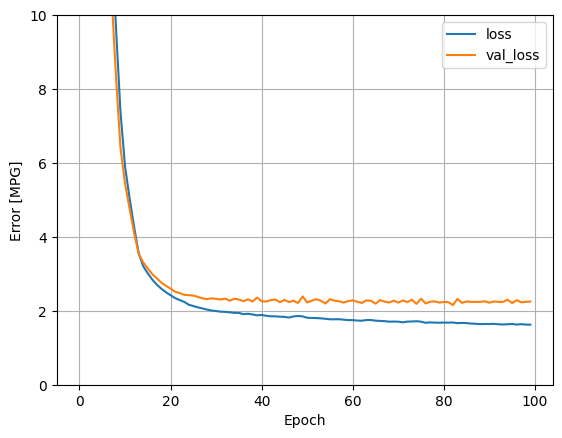

In [26]:
plot_loss(history)

In [31]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(test_results)

1.6659988164901733


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


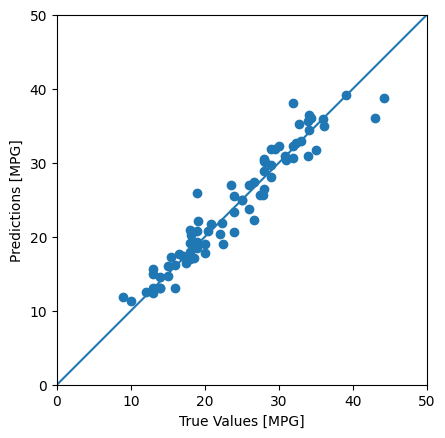

In [28]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

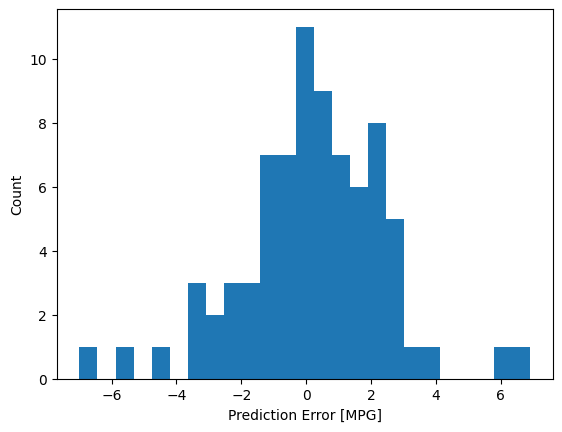

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [32]:
from sklearn.metrics import r2_score

In [33]:
test_predictions = dnn_model.predict(test_features).flatten()
r2 = r2_score(test_labels, test_predictions)
print("R-squared (R2) Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R-squared (R2) Score: 0.922398417740026


In [30]:
dnn_model.save('dnn_model.keras')